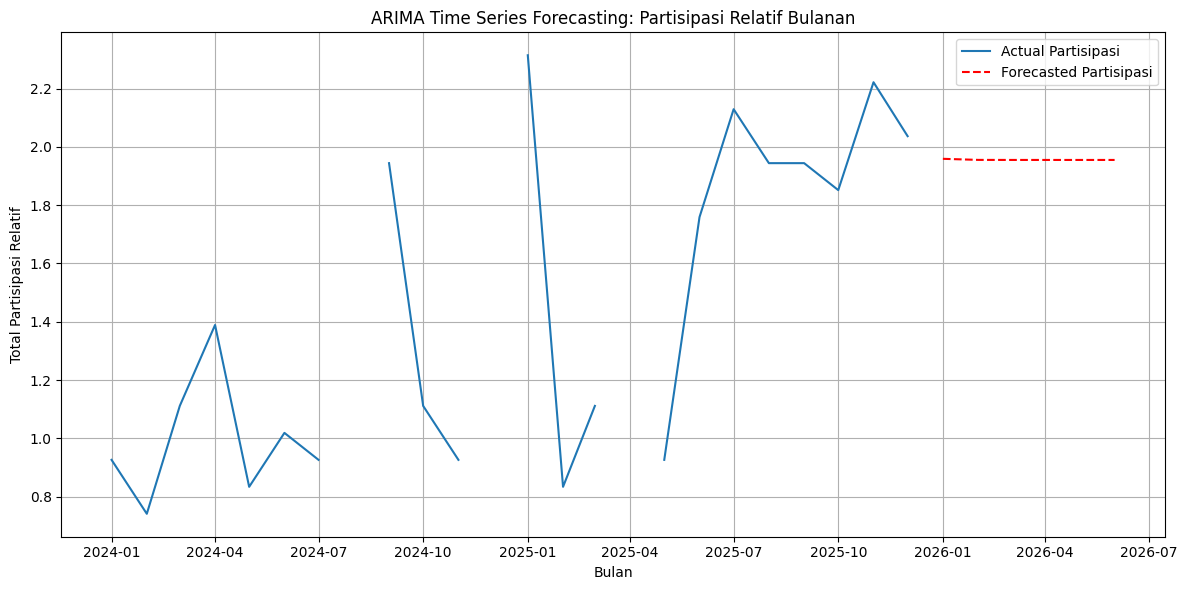

  Forecast_Date  Forecasted_Partisipasi
0    2026-01-01                1.959314
1    2026-02-01                1.955628
2    2026-03-01                1.955454
3    2026-04-01                1.955445
4    2026-05-01                1.955445
5    2026-06-01                1.955445


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# STEP 1: Baca data dari CSV
df = pd.read_csv("D:/ECO TECHNO LEADER/MANGROVECHAIN/community.csv", parse_dates=["engagement_date"])

# STEP 2: Buat data bulanan: agregasi partisipasi_relatif per bulan
df['bulan'] = df['engagement_date'].dt.to_period('M').dt.to_timestamp()
df_bulanan = df.groupby('bulan')['partisipasi_relatif'].sum().reset_index()

# STEP 3: Jadikan kolom tanggal sebagai index time-series
df_bulanan.set_index('bulan', inplace=True)
df_bulanan = df_bulanan.asfreq('MS')  # MS = Month Start

# STEP 4: Fit Model ARIMA
model = ARIMA(df_bulanan['partisipasi_relatif'], order=(1, 1, 1))
model_fit = model.fit()

# STEP 5: Forecast 6 bulan ke depan
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_bulanan.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# STEP 6: Visualisasi hasil forecast
plt.figure(figsize=(12,6))
plt.plot(df_bulanan.index, df_bulanan['partisipasi_relatif'], label='Actual Partisipasi')
plt.plot(forecast_dates, forecast, label='Forecasted Partisipasi', linestyle='--', color='red')
plt.title('ARIMA Time Series Forecasting: Partisipasi Relatif Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Partisipasi Relatif')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("forecast_partisipasi_relatif_kamu.png")
plt.show()

# STEP 7: Tampilkan hasil prediksi
forecast_df = pd.DataFrame({
    'Forecast_Date': forecast_dates,
    'Forecasted_Partisipasi': forecast.values
})
print(forecast_df)
